<a href="https://colab.research.google.com/github/mikelalvarezbejarano/sis420/blob/main/mikelalvarezbejaranoprimerparcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np

# Librerias para graficar
from matplotlib import pyplot

# Modulo de optimización de scipy
from scipy import optimize

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

In [4]:
!ls
%mkdir data
!ls

breast_cancer.csv  drive  sample_data
breast_cancer.csv  data  drive	sample_data


In [7]:
import shutil

shutil.copy("/content/breast_cancer.csv","/content/data/regre_logioprimerparcial.txt")

'/content/data/regre_logioprimerparcial.txt'

In [10]:
data = pd.read_csv('/content/data/regre_logioprimerparcial.txt')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              683 non-null    int64
 1   Uniformity of Cell Size      683 non-null    int64
 2   Uniformity of Cell Shape     683 non-null    int64
 3   Marginal Adhesion            683 non-null    int64
 4   Single Epithelial Cell Size  683 non-null    int64
 5   Bare Nuclei                  683 non-null    int64
 6   Bland Chromatin              683 non-null    int64
 7   Normal Nucleoli              683 non-null    int64
 8   Mitoses                      683 non-null    int64
 9   Class                        683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


In [22]:
#este paso no lo realizo proque como todo de mi dataset es entero y no tiene letra no elimino ninguna columna
# Supongamos que 'data' es tu DataFrame
#Clump_Thickness = ''

# Crea una nueva columna numérica y copia los valores de la columna categórica

# Elimina la columna categórica original
data.drop(Clump_Thickness, axis=1, inplace=True)

KeyError: ignored

In [17]:
condiciones = (data['id'] <= 683)
data = data[Class]
data.to_csv('/content/data/regre_logi1.txt', index=False)

KeyError: ignored

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              683 non-null    int64
 1   Uniformity of Cell Size      683 non-null    int64
 2   Uniformity of Cell Shape     683 non-null    int64
 3   Marginal Adhesion            683 non-null    int64
 4   Single Epithelial Cell Size  683 non-null    int64
 5   Bare Nuclei                  683 non-null    int64
 6   Bland Chromatin              683 non-null    int64
 7   Normal Nucleoli              683 non-null    int64
 8   Mitoses                      683 non-null    int64
 9   Class                        683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


In [24]:
data = pd.read_csv('/content/data/regre_logi1.txt')

FileNotFoundError: ignored

In [ ]:
#variables categoricas
columnas_categoricas = data.select_dtypes(include=['object']).columns
#variables fechas
columnas_fechas = data.select_dtypes(include=['datetime64']).columns

In [ ]:
for columna in columnas_categoricas:
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])

In [ ]:
#Fechas a numeros
for columna in columnas_fechas:
  data[columna] = pd.to_numeric(data[columna].map(datetime.timestamp))

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   id           10000 non-null  int64
 1   Airline      10000 non-null  int64
 2   Flight       10000 non-null  int64
 3   AirportFrom  10000 non-null  int64
 4   AirportTo    10000 non-null  int64
 5   Time         10000 non-null  int64
 6   Length       10000 non-null  int64
 7   Delay        10000 non-null  int64
dtypes: int64(8)
memory usage: 625.1 KB


In [25]:
# Importar libreria para dividir entrenamiento y prueba
from sklearn.model_selection import train_test_split

In [26]:
# Division de dataset en entrenamiento y prueba
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [27]:
print(train_data)

     Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
437                3                        1                         1   
256                7                        9                         4   
584                5                        2                         4   
18                10                        7                         7   
350                2                        1                         1   
..               ...                      ...                       ...   
71                 9                        4                         5   
106                1                        1                         1   
270               10                        5                         7   
435                4                        1                         1   
102               10                       10                        10   

     Marginal Adhesion  Single Epithelial Cell Size  Bare Nuclei  \
437                  3         

In [28]:
print(test_data)

     Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
292                8                        3                         4   
145                8                        8                         7   
211                1                        1                         1   
118                1                        1                         2   
302                1                        1                         1   
..               ...                      ...                       ...   
110               10                        3                         3   
82                 3                        5                         7   
51                 5                        5                         5   
210                1                        1                         1   
548                3                        1                         1   

     Marginal Adhesion  Single Epithelial Cell Size  Bare Nuclei  \
292                  9         

In [29]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546 entries, 437 to 102
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              546 non-null    int64
 1   Uniformity of Cell Size      546 non-null    int64
 2   Uniformity of Cell Shape     546 non-null    int64
 3   Marginal Adhesion            546 non-null    int64
 4   Single Epithelial Cell Size  546 non-null    int64
 5   Bare Nuclei                  546 non-null    int64
 6   Bland Chromatin              546 non-null    int64
 7   Normal Nucleoli              546 non-null    int64
 8   Mitoses                      546 non-null    int64
 9   Class                        546 non-null    int64
dtypes: int64(10)
memory usage: 46.9 KB


In [30]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137 entries, 292 to 548
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              137 non-null    int64
 1   Uniformity of Cell Size      137 non-null    int64
 2   Uniformity of Cell Shape     137 non-null    int64
 3   Marginal Adhesion            137 non-null    int64
 4   Single Epithelial Cell Size  137 non-null    int64
 5   Bare Nuclei                  137 non-null    int64
 6   Bland Chromatin              137 non-null    int64
 7   Normal Nucleoli              137 non-null    int64
 8   Mitoses                      137 non-null    int64
 9   Class                        137 non-null    int64
dtypes: int64(10)
memory usage: 11.8 KB


In [31]:
train_data.to_csv("entrenamiento.csv", index=False)

In [32]:
test_data.to_csv("prueva.csv", index=False)

In [33]:
#Carga de dataset
data = pd.read_csv('/content/entrenamiento.csv')

In [34]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546 entries, 437 to 102
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              546 non-null    int64
 1   Uniformity of Cell Size      546 non-null    int64
 2   Uniformity of Cell Shape     546 non-null    int64
 3   Marginal Adhesion            546 non-null    int64
 4   Single Epithelial Cell Size  546 non-null    int64
 5   Bare Nuclei                  546 non-null    int64
 6   Bland Chromatin              546 non-null    int64
 7   Normal Nucleoli              546 non-null    int64
 8   Mitoses                      546 non-null    int64
 9   Class                        546 non-null    int64
dtypes: int64(10)
memory usage: 46.9 KB


In [35]:
X = data.iloc[:, :7]
y = data.iloc[:, 7]
m = y.size

In [36]:
print(X)
print('*'*25)
print(y)

     Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
0                  3                        1                         1   
1                  7                        9                         4   
2                  5                        2                         4   
3                 10                        7                         7   
4                  2                        1                         1   
..               ...                      ...                       ...   
541                9                        4                         5   
542                1                        1                         1   
543               10                        5                         7   
544                4                        1                         1   
545               10                       10                        10   

     Marginal Adhesion  Single Epithelial Cell Size  Bare Nuclei  \
0                    3         

In [37]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma


In [38]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

     Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
0                  3                        1                         1   
1                  7                        9                         4   
2                  5                        2                         4   
3                 10                        7                         7   
4                  2                        1                         1   
..               ...                      ...                       ...   
541                9                        4                         5   
542                1                        1                         1   
543               10                        5                         7   
544                4                        1                         1   
545               10                       10                        10   

     Marginal Adhesion  Single Epithelial Cell Size  Bare Nuclei  \
0                    3         

In [39]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

In [40]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [41]:
print(X)

[[ 1.         -0.51298931 -0.6898418  ... -0.544251   -0.68063032
  -0.9722168 ]
 [ 1.          0.93638799  1.9303573  ...  3.13007417 -0.12925917
   0.70762615]
 [ 1.          0.21169934 -0.36231691 ... -1.00354165 -0.68063032
  -0.9722168 ]
 ...
 [ 1.          2.02342097  0.62025775 ... -0.08496036  0.97348314
  -0.13229532]
 [ 1.         -0.15064499 -0.6898418  ... -1.00354165 -0.68063032
  -0.55225606]
 [ 1.          2.02342097  2.25788219 ...  3.13007417 -0.68063032
   1.96750837]]


In [42]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [43]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

In [44]:
#Carga de dataset
data = pd.read_csv('/content/prueva.csv')
print(data)

     Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
0                  8                        3                         4   
1                  8                        8                         7   
2                  1                        1                         1   
3                  1                        1                         2   
4                  1                        1                         1   
..               ...                      ...                       ...   
132               10                        3                         3   
133                3                        5                         7   
134                5                        5                         5   
135                1                        1                         1   
136                3                        1                         1   

     Marginal Adhesion  Single Epithelial Cell Size  Bare Nuclei  \
0                    9         

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              137 non-null    int64
 1   Uniformity of Cell Size      137 non-null    int64
 2   Uniformity of Cell Shape     137 non-null    int64
 3   Marginal Adhesion            137 non-null    int64
 4   Single Epithelial Cell Size  137 non-null    int64
 5   Bare Nuclei                  137 non-null    int64
 6   Bland Chromatin              137 non-null    int64
 7   Normal Nucleoli              137 non-null    int64
 8   Mitoses                      137 non-null    int64
 9   Class                        137 non-null    int64
dtypes: int64(10)
memory usage: 10.8 KB


In [56]:
fila_deseada = 2

if fila_deseada < len(data):
  fila_completa = data.iloc[fila_deseada].to_numpy()
  print(fila_completa)
else:
  print("La fila no existe")

[1 1 1 1 2 1 3 1 1 2]


<ipython-input-42-9bf1ce321844>:7: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))


theta calculado por el descenso por el gradiente: [11.82943784  5.92285698  8.19880972  8.4437793   7.0540375   7.78111415
  6.55455022  7.76347163]
Un estudiante con nota del examen 1: 4743 y nota del examen 2: 5 (usando el descenso por el gradiente):1.0


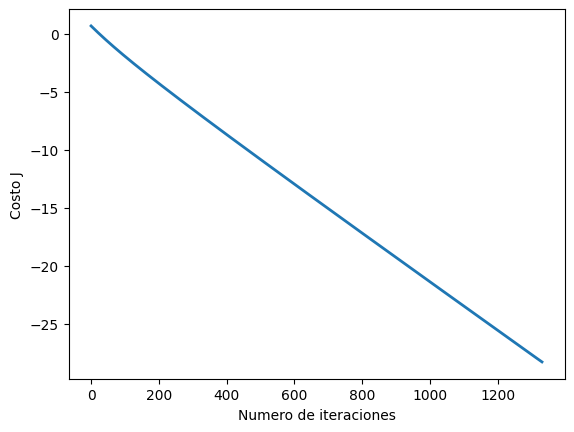

In [58]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 5000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(8)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# verificar si ingresa el vuelo esta retrasado
X_array = [1, 4743,    5, 2089,  190,  252,  585,  242]

aprueba = sigmoid(np.dot(X_array, theta))   # Se debe cambiar esto

print(f"Un estudiante con nota del examen 1: {X_array[1]} y nota del examen 2: {X_array[2]} (usando el descenso por el gradiente):{aprueba}")